# Exploring Relationships

### Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.8.0'

In [3]:
sns.__version__


'0.12.2'

In [4]:
%matplotlib inline

In [5]:
# Define path
path = r'/Users/rachelgrigiac/Documents/CareerFoundry/BIXI Project Analysis'

In [5]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bixitrips_weather.pkl'))

### Deriving variables
Before exploring relationships, I decided to add more variables, such as the months, the seasons, the frequency of trips per month, and the distance.

In [5]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude
0,6223,6004,1620.0,False,2014,2014-06-01,00:00:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Hôtel-de-Ville (du Champs-de-Mars / Gosford),45.509229,-73.554470
1,6223,6004,1680.0,False,2014,2014-06-01,00:00:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Hôtel-de-Ville (du Champs-de-Mars / Gosford),45.509229,-73.554470
2,6223,6248,780.0,True,2014,2014-06-01,00:47:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,St-Dominique / Rachel,45.518593,-73.581566
3,6223,6155,660.0,True,2014,2014-06-01,01:05:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Garnier / du Mont-Royal,45.530920,-73.576740
4,6223,6121,1080.0,True,2014,2014-06-01,01:06:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Rouen / du Havre,45.534864,-73.555455


In [10]:
len(df)

28537336

In [13]:
# converting the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [14]:
# adding the month column
df['month'] = df['date'].dt.month

In [16]:
len(df)

28537336

In [20]:
df['month'].value_counts()

month
7     5273442
8     5116699
6     4672005
9     4462617
5     4008781
10    3023402
4     1161467
11     818923
Name: count, dtype: int64

In [17]:
# adding a season column
df.loc[df['month'].isin([12,1,2]),'season'] = 'Winter'
df.loc[df['month'].isin([3,4,5]), 'season'] = 'Spring'
df.loc[df['month'].isin([6,7,8]), 'season'] = 'Summer'
df.loc[df['month'].isin([9,10,11]), 'season'] = 'Fall'

In [18]:
df.head()

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,month,season
0,6223,6004,1620.0,False,2014,2014-06-01,00:00:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Hôtel-de-Ville (du Champs-de-Mars / Gosford),45.509229,-73.554470,6,Summer
1,6223,6004,1680.0,False,2014,2014-06-01,00:00:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Hôtel-de-Ville (du Champs-de-Mars / Gosford),45.509229,-73.554470,6,Summer
2,6223,6248,780.0,True,2014,2014-06-01,00:47:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,St-Dominique / Rachel,45.518593,-73.581566,6,Summer
3,6223,6155,660.0,True,2014,2014-06-01,01:05:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Garnier / du Mont-Royal,45.530920,-73.576740,6,Summer
4,6223,6121,1080.0,True,2014,2014-06-01,01:06:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Rouen / du Havre,45.534864,-73.555455,6,Summer


In [21]:
df['season'].value_counts()

season
Summer    15062146
Fall       8304942
Spring     5170248
Name: count, dtype: int64

In [22]:
# adding a new column for the day of the week
df['day_of_week'] = df['date'].dt.day_name()

In [23]:
df['day_of_week'].value_counts()

day_of_week
Wednesday    4453819
Thursday     4449660
Friday       4352178
Tuesday      4259882
Monday       3877549
Saturday     3715566
Sunday       3428682
Name: count, dtype: int64

In [24]:
# haversine formula to calculate the distance
def haversine(lat1, lon1, lat2, lon2):
    # converting latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # radius of Earth in kilometers (6371)
    km = 6371 * c
    return km


In [25]:
# adding a distance column
df['distance'] = df.apply(lambda row: haversine(row['start_station_latitude'], row['start_station_longitude'], 
                                                row['end_station_latitude'], row['end_station_longitude']), axis=1)

In [26]:
df.head()

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,month,season,day_of_week,distance
0,6223,6004,1620.0,False,2014,2014-06-01,00:00:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Hôtel-de-Ville (du Champs-de-Mars / Gosford),45.509229,-73.554470,6,Summer,Sunday,2.825929
1,6223,6004,1680.0,False,2014,2014-06-01,00:00:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Hôtel-de-Ville (du Champs-de-Mars / Gosford),45.509229,-73.554470,6,Summer,Sunday,2.825929
2,6223,6248,780.0,True,2014,2014-06-01,00:47:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,St-Dominique / Rachel,45.518593,-73.581566,6,Summer,Sunday,0.605685
3,6223,6155,660.0,True,2014,2014-06-01,01:05:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Garnier / du Mont-Royal,45.530920,-73.576740,6,Summer,Sunday,1.818796
4,6223,6121,1080.0,True,2014,2014-06-01,01:06:00,0.0,75.24,16.8,22.4,9.33,13.07,2.44,0.85,3.6,2.75,du Mont-Royal / du Parc,45.517,-73.589,Rouen / du Havre,45.534864,-73.555455,6,Summer,Sunday,3.282475


In [27]:
# adding a new column with the frequency of trips per month for each year
df['monthly_trip_count'] = df.groupby(['yearid', 'month'])['yearid'].transform('count')

In [28]:
df['monthly_trip_count'].value_counts()

monthly_trip_count
1096019    1096019
1043014    1043014
926547      926547
906254      906254
902892      902892
870845      870845
846041      846041
819773      819773
810352      810352
783492      783492
777835      777835
766331      766331
716209      716209
710116      710116
671711      671711
649332      649332
645127      645127
617147      617147
613846      613846
609326      609326
605379      605379
591237      591237
567159      567159
563012      563012
551930      551930
546696      546696
546683      546683
546456      546456
533205      533205
531262      531262
523232      523232
523230      523230
505833      505833
505767      505767
477502      477502
464815      464815
440135      440135
386283      386283
374381      374381
341026      341026
324869      324869
324645      324645
235609      235609
229301      229301
187883      187883
186434      186434
149241      149241
149000      149000
146267      146267
144492      144492
142309      142309
124272      

In [29]:
len(df)

28537336

In [30]:
# Exporting new dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bixitrips_weather_new.pkl'))

# Since I encountered a lot of memory issues doing this exercise and the previous one, I decided to reduce the dataset to 3 years instead of 6 (2017-2020).

In [5]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bixitrips_weather_new.pkl'))

In [7]:
# Filter out the rows where yearid is 2014, 2015, or 2016
df = df[~df['yearid'].isin([2014, 2015, 2016])]

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,month,season,day_of_week,distance,monthly_trip_count
10143245,7060,7060,1860.0,True,2017,2017-04-15,00:00:00,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de l'Église / de Verdun,45.463001,-73.571569,4,Spring,Saturday,0.000000,187883
10143246,7060,6406,1020.0,True,2017,2017-04-15,09:37:00,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143247,7060,6406,1080.0,True,2017,2017-04-15,09:37:00,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143248,7060,6712,2160.0,True,2017,2017-04-15,11:34:00,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,LaSalle / Crawford,45.437914,-73.582740,4,Spring,Saturday,2.922527,187883
10143249,7060,6052,3120.0,False,2017,2017-04-15,11:53:00,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de la Commune / King,45.498030,-73.552665,4,Spring,Saturday,4.164580,187883


In [11]:
df.tail()

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,month,season,day_of_week,distance,monthly_trip_count
28537331,8036,6216,782.0,True,2020,2020-11-14,18:16:15,0.76,80.96,0.41,4.65,-4.04,8.69,3.83,1.75,5.79,4.05,Messier / St-Joseph,45.539461,-73.576056,Parc Jeanne Mance (monument sir George-Etienne...,45.514840,-73.584779,11,Fall,Saturday,2.820759,144492
28537332,8036,6047,2158.0,True,2020,2020-11-14,18:29:49,0.76,80.96,0.41,4.65,-4.04,8.69,3.83,1.75,5.79,4.05,Messier / St-Joseph,45.539461,-73.576056,University / Prince-Arthur,45.507402,-73.578444,11,Fall,Saturday,3.569634,144492
28537333,8036,6150,113.0,True,2020,2020-11-15,01:44:14,6.48,83.75,0.59,5.60,-4.55,10.15,5.35,1.55,7.85,6.31,Messier / St-Joseph,45.539461,-73.576056,Messier / du Mont-Royal,45.537114,-73.571003,11,Fall,Sunday,0.472207,144492
28537334,8036,6151,146.0,True,2020,2020-11-15,17:31:37,6.48,83.75,0.59,5.60,-4.55,10.15,5.35,1.55,7.85,6.31,Messier / St-Joseph,45.539461,-73.576056,des Érables / du Mont-Royal,45.535854,-73.572055,11,Fall,Sunday,0.507961,144492
28537335,8036,7030,414.0,True,2020,2020-11-15,19:33:37,6.48,83.75,0.59,5.60,-4.55,10.15,5.35,1.55,7.85,6.31,Messier / St-Joseph,45.539461,-73.576056,de Bordeaux / Marie-Anne,45.533409,-73.570657,11,Fall,Sunday,0.793498,144492


In [12]:
len(df)

18394091

In [13]:
# Calculate the memory usage of the DataFrame
memory_usage = df.memory_usage(deep=True).sum()

# Convert the memory usage to megabytes
memory_usage_mb = memory_usage / (1024**2)

print(f'The size of the dataset is {memory_usage_mb:.2f} MB')

The size of the dataset is 9654.51 MB


In [26]:
# Exporting new dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bixitrips_weather_last.pkl'))

In [5]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bixitrips_weather_last.pkl'))

# UPDATE: The duration_sec column has negative values, which wasn't handled in the previous exercise. I will take care of it before starting this exercise.

In [6]:
# Filter rows where duration_sec > 0
filtered_df = df[df['duration_sec'] < 0]

In [7]:
len(filtered_df)

63

In [13]:
# Select specific columns
subset_df = filtered_df[['duration_sec','start_station_code', 'end_station_code', 'start_station_name', 'end_station_name', 'distance']]

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
subset_df

,duration_sec,start_station_code,end_station_code,start_station_name,end_station_name,distance
10155798,-2640.0,6173,6372,Berri / Cherrier,1ère avenue / Masson,2.953357
10276332,-3060.0,6012,6903,Métro St-Laurent (de Maisonneuve / St-Laurent),Napoléon / St-Dominique,1.200608
10276333,-2340.0,6012,7019,Métro St-Laurent (de Maisonneuve / St-Laurent),Jeanne d'Arc / Ontario,4.687351
10578924,-2220.0,6184,7070,Métro Mont-Royal (Rivard / du Mont-Royal),Bourgeoys / Favard,5.390642
10578928,-2160.0,6184,6397,Métro Mont-Royal (Rivard / du Mont-Royal),Marché Maisonneuve,4.597384
10604472,-1860.0,6902,6310,Beaudry / Ontario,de Darlington / de la Côte-Ste-Catherine,4.925425
10624628,-2940.0,6190,7073,Pontiac / Gilford,Logan / de Champlain,2.369400
10712884,-2940.0,6274,6220,de la Roche / St-Joseph,Laval / Duluth,1.422171
11008516,-1680.0,6213,7078,Duluth / St-Laurent,Hochelaga / Chapleau,2.490160
11008517,-3060.0,6213,6154,Duluth / St-Laurent,Marquette / du Mont-Royal,1.742292


In [16]:
pd.reset_option('display.max_rows')

##### There are only 63 rows and I don't see any patterns so I will just delete them.

In [17]:
df = df[df['duration_sec'] >= 0]

In [18]:
len(df)

18394028

In [20]:
# Exporting new dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bixitrips_weather_last.pkl'))

### 1. Pick out variables from the data set suitable for the exploratory visual analysis

In [6]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bixitrips_weather_last.pkl'))

In [21]:
df.head()

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,...,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,month,season,day_of_week,distance,monthly_trip_count
10143245,7060,7060,1860.0,True,2017,2017-04-15,00:00:00,4.7,85.38,9.49,...,45.463001,-73.571569,de l'Église / de Verdun,45.463001,-73.571569,4,Spring,Saturday,0.000000,187883
10143246,7060,6406,1020.0,True,2017,2017-04-15,09:37:00,4.7,85.38,9.49,...,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143247,7060,6406,1080.0,True,2017,2017-04-15,09:37:00,4.7,85.38,9.49,...,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143248,7060,6712,2160.0,True,2017,2017-04-15,11:34:00,4.7,85.38,9.49,...,45.463001,-73.571569,LaSalle / Crawford,45.437914,-73.582740,4,Spring,Saturday,2.922527,187883
10143249,7060,6052,3120.0,False,2017,2017-04-15,11:53:00,4.7,85.38,9.49,...,45.463001,-73.571569,de la Commune / King,45.498030,-73.552665,4,Spring,Saturday,4.164580,187883


##### Transforming categorical columns to numerical values so I can explore relationships

In [7]:
# Convert 'is_member' to numerical values (True -> 1, False -> 0)
df['is_member'] = df['is_member'].astype(int)

In [9]:
df['is_member'].value_counts()

is_member
1    15206349
0     3187679
Name: count, dtype: int64

In [8]:
# Encoding 'season'
season_mapping = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}
df['season_encoded'] = df['season'].map(season_mapping)

In [18]:
df['season_encoded'].value_counts()

season_encoded
1    9861917
2    5310174
0    3221937
Name: count, dtype: int64

In [19]:
df['season'].value_counts()

season
Summer    9861917
Fall      5310174
Spring    3221937
Name: count, dtype: int64

In [9]:
# Encoding "day_of_week"
day_of_week_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['day_of_week_encoded'] = df['day_of_week'].map(day_of_week_mapping)

In [21]:
df['day_of_week_encoded'].value_counts()

day_of_week_encoded
2    2845165
3    2829312
4    2759182
1    2724579
5    2473666
0    2454504
6    2307620
Name: count, dtype: int64

In [22]:
df['day_of_week'].value_counts()

day_of_week
Wednesday    2845165
Thursday     2829312
Friday       2759182
Tuesday      2724579
Saturday     2473666
Monday       2454504
Sunday       2307620
Name: count, dtype: int64

In [23]:
df.head()

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,...,end_station_name,end_station_latitude,end_station_longitude,month,season,day_of_week,distance,monthly_trip_count,season_encoded,day_of_week_encoded
10143245,7060,7060,1860.0,1,2017,2017-04-15,00:00:00,4.7,85.38,9.49,...,de l'Église / de Verdun,45.463001,-73.571569,4,Spring,Saturday,0.000000,187883,0,5
10143246,7060,6406,1020.0,1,2017,2017-04-15,09:37:00,4.7,85.38,9.49,...,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883,0,5
10143247,7060,6406,1080.0,1,2017,2017-04-15,09:37:00,4.7,85.38,9.49,...,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883,0,5
10143248,7060,6712,2160.0,1,2017,2017-04-15,11:34:00,4.7,85.38,9.49,...,LaSalle / Crawford,45.437914,-73.582740,4,Spring,Saturday,2.922527,187883,0,5
10143249,7060,6052,3120.0,0,2017,2017-04-15,11:53:00,4.7,85.38,9.49,...,de la Commune / King,45.498030,-73.552665,4,Spring,Saturday,4.164580,187883,0,5


date, start_time, and all the station names and their latitude/longitude, are not needed for this exercise.

In [24]:
# Create a subset
sub = df[['start_station_code','end_station_code','duration_sec','is_member','yearid','prectot','rh2m','t2m','t2m_max','t2m_min','t2m_range','ws10m','ws10m_min','ws10m_max','ws10m_range','month','distance','monthly_trip_count','season_encoded','day_of_week_encoded']]

In [25]:
sub

,start_station_code,end_station_code,duration_sec,is_member,yearid,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,month,distance,monthly_trip_count,season_encoded,day_of_week_encoded
10143245,7060,7060,1860.0,1,2017,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,0.000000,187883,0,5
10143246,7060,6406,1020.0,1,2017,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,1.970269,187883,0,5
10143247,7060,6406,1080.0,1,2017,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,1.970269,187883,0,5
10143248,7060,6712,2160.0,1,2017,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,2.922527,187883,0,5
10143249,7060,6052,3120.0,0,2017,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,4.164580,187883,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28537331,8036,6216,782.0,1,2020,0.76,80.96,0.41,4.65,-4.04,8.69,3.83,1.75,5.79,4.05,11,2.820759,144492,2,5
28537332,8036,6047,2158.0,1,2020,0.76,80.96,0.41,4.65,-4.04,8.69,3.83,1.75,5.79,4.05,11,3.569634,144492,2,5
28537333,8036,6150,113.0,1,2020,6.48,83.75,0.59,5.60,-4.55,10.15,5.35,1.55,7.85,6.31,11,0.472207,144492,2,6
28537334,8036,6151,146.0,1,2020,6.48,83.75,0.59,5.60,-4.55,10.15,5.35,1.55,7.85,6.31,11,0.507961,144492,2,6


In [26]:
sub.corr()

,start_station_code,end_station_code,duration_sec,is_member,yearid,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,month,distance,monthly_trip_count,season_encoded,day_of_week_encoded
start_station_code,1.000000,0.132323,0.025756,0.004952,0.067382,-0.003236,-0.013702,-0.001991,-0.000351,-0.003069,0.006367,-0.002675,-0.002504,-0.002847,-0.001919,0.004586,0.043749,-0.005033,0.004418,0.002323
end_station_code,0.132323,1.000000,0.028698,0.002452,0.070735,-0.003041,-0.014164,-0.000415,0.001265,-0.001571,0.006784,-0.002820,-0.002920,-0.003125,-0.001989,0.004136,0.032484,-0.003401,0.003800,0.002544
duration_sec,0.025756,0.028698,1.000000,-0.258985,0.060993,-0.043137,-0.056216,0.057959,0.064867,0.043811,0.055186,-0.023730,-0.009083,-0.027749,-0.029421,-0.056777,0.621323,0.006835,-0.052533,0.059949
is_member,0.004952,0.002452,-0.258985,1.000000,-0.034914,0.029292,0.044039,-0.060838,-0.066326,-0.050883,-0.042095,0.024054,0.004446,0.027650,0.032546,0.035989,-0.050499,-0.034253,0.035310,-0.139098
yearid,0.067382,0.070735,0.060993,-0.034914,1.000000,-0.031969,-0.225802,0.025151,0.046570,0.003887,0.104497,-0.017786,-0.039897,-0.012844,0.011357,0.003988,0.037617,-0.074852,0.006851,0.027413
prectot,-0.003236,-0.003041,-0.043137,0.029292,-0.031969,1.000000,0.514065,0.038773,-0.031115,0.114238,-0.344689,0.253122,0.107892,0.310270,0.324555,0.012495,-0.025836,-0.006010,0.018693,-0.015842
rh2m,-0.013702,-0.014164,-0.056216,0.044039,-0.225802,0.514065,1.000000,-0.078790,-0.161628,0.029066,-0.462836,0.245567,0.128274,0.273750,0.263347,0.012841,-0.033824,-0.169799,0.010775,-0.058947
t2m,-0.001991,-0.000415,0.057959,-0.060838,0.025151,0.038773,-0.078790,1.000000,0.980175,0.967176,0.115782,-0.159584,-0.068044,-0.179004,-0.183302,-0.090518,0.034659,0.620072,-0.054763,-0.010080
t2m_max,-0.000351,0.001265,0.064867,-0.066326,0.046570,-0.031115,-0.161628,0.980175,1.000000,0.913606,0.290240,-0.185522,-0.075286,-0.207485,-0.214992,-0.077310,0.038078,0.602652,-0.042470,-0.000433
t2m_min,-0.003069,-0.001571,0.043811,-0.050883,0.003887,0.114238,0.029066,0.967176,0.913606,1.000000,-0.123933,-0.136806,-0.067760,-0.150118,-0.146245,-0.034445,0.027438,0.598020,-0.006125,-0.012512


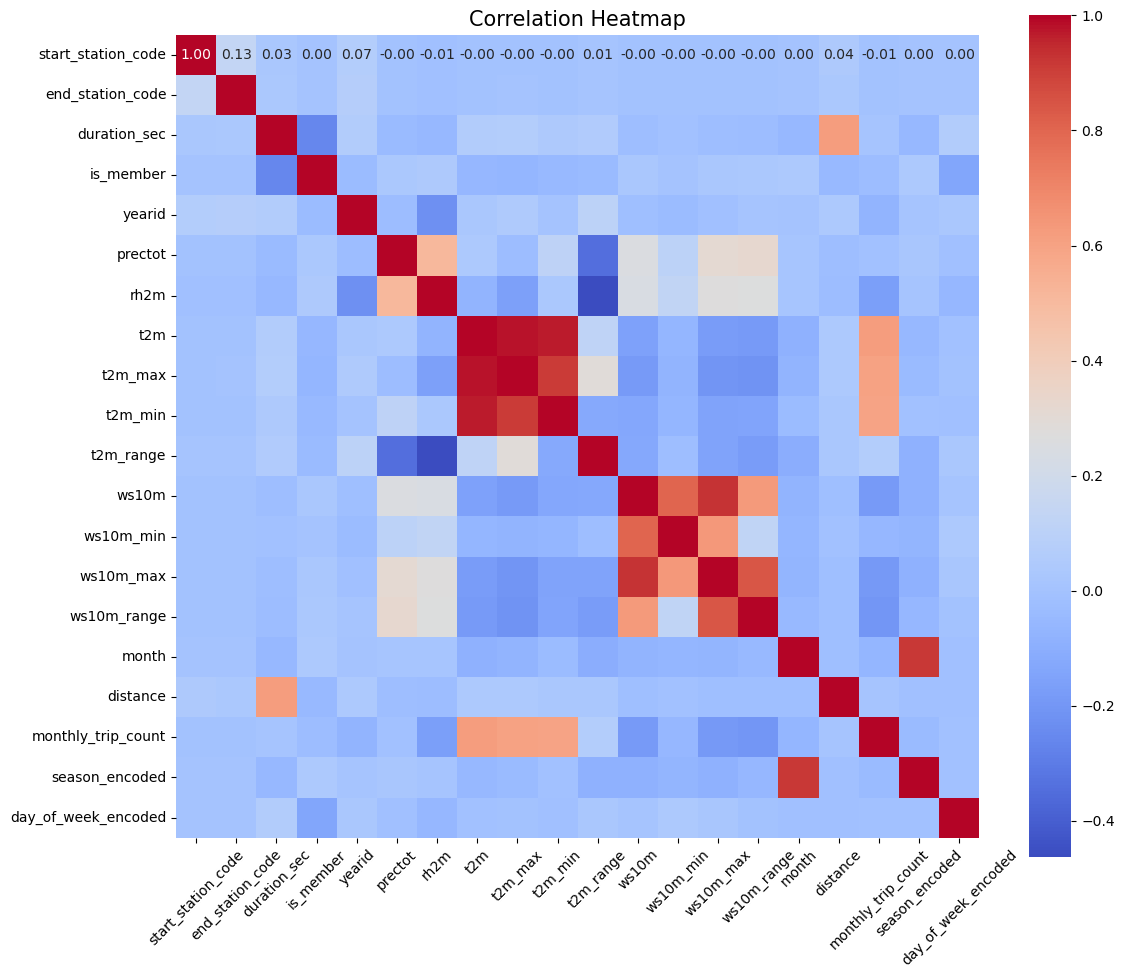

In [27]:
#create a subplot with matplotlib
plt.figure(figsize=(12, 10))

#create the correlation heatmap
sns.heatmap(sub.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap', size=15)
plt.xticks(rotation=45, ha='center')
plt.tight_layout()

# saving figure
plt.savefig("out.png") 

# showing the plot
plt.show()

In [20]:
#current dir
cwd = os.getcwd()
cwd

'/Users/rachelgrigiac/Documents/CareerFoundry/BIXI Project Analysis/03 Scripts'

### 2. Create a scatterplot (or plots) for the variables with the strongest correlations

In [10]:
# Randomize data before sampling
np.random.seed(4)

In [11]:
# Create a dev list (70/30)
dev = np.random.rand(len(df)) <= 0.7

In [12]:
# Split data in two samples
big = df[dev]
small = df [~dev]

In [15]:
# Check the results
len(df)

18394028

In [16]:
len(big) + len(small)

18394028

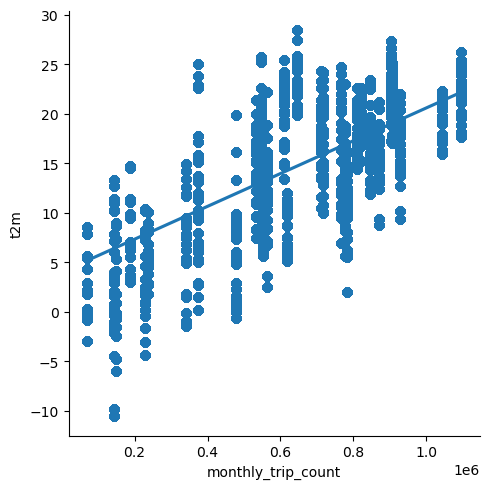

In [33]:
# Create a scatterplot for the "monthly_trip_count" and "t2m" columns in seaborn

scat = sns.lmplot(x = 'monthly_trip_count', y = 't2m', data = small)

There is a clear positive correlation: as the monthly trip count increases, the temperature also tends to increase. The spread of points indicates variability in both trip count and temperature across different months.

In [34]:
# saving figure
scat.savefig("scat.png") 

### 3. Create a pair plot of the entire data set

In [13]:
sub_2 = small[['duration_sec','is_member','yearid','prectot','rh2m','t2m','ws10m','month','distance','monthly_trip_count','season_encoded','day_of_week_encoded']]

In [14]:
pd.option_context('mode.use_inf_as_na', True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

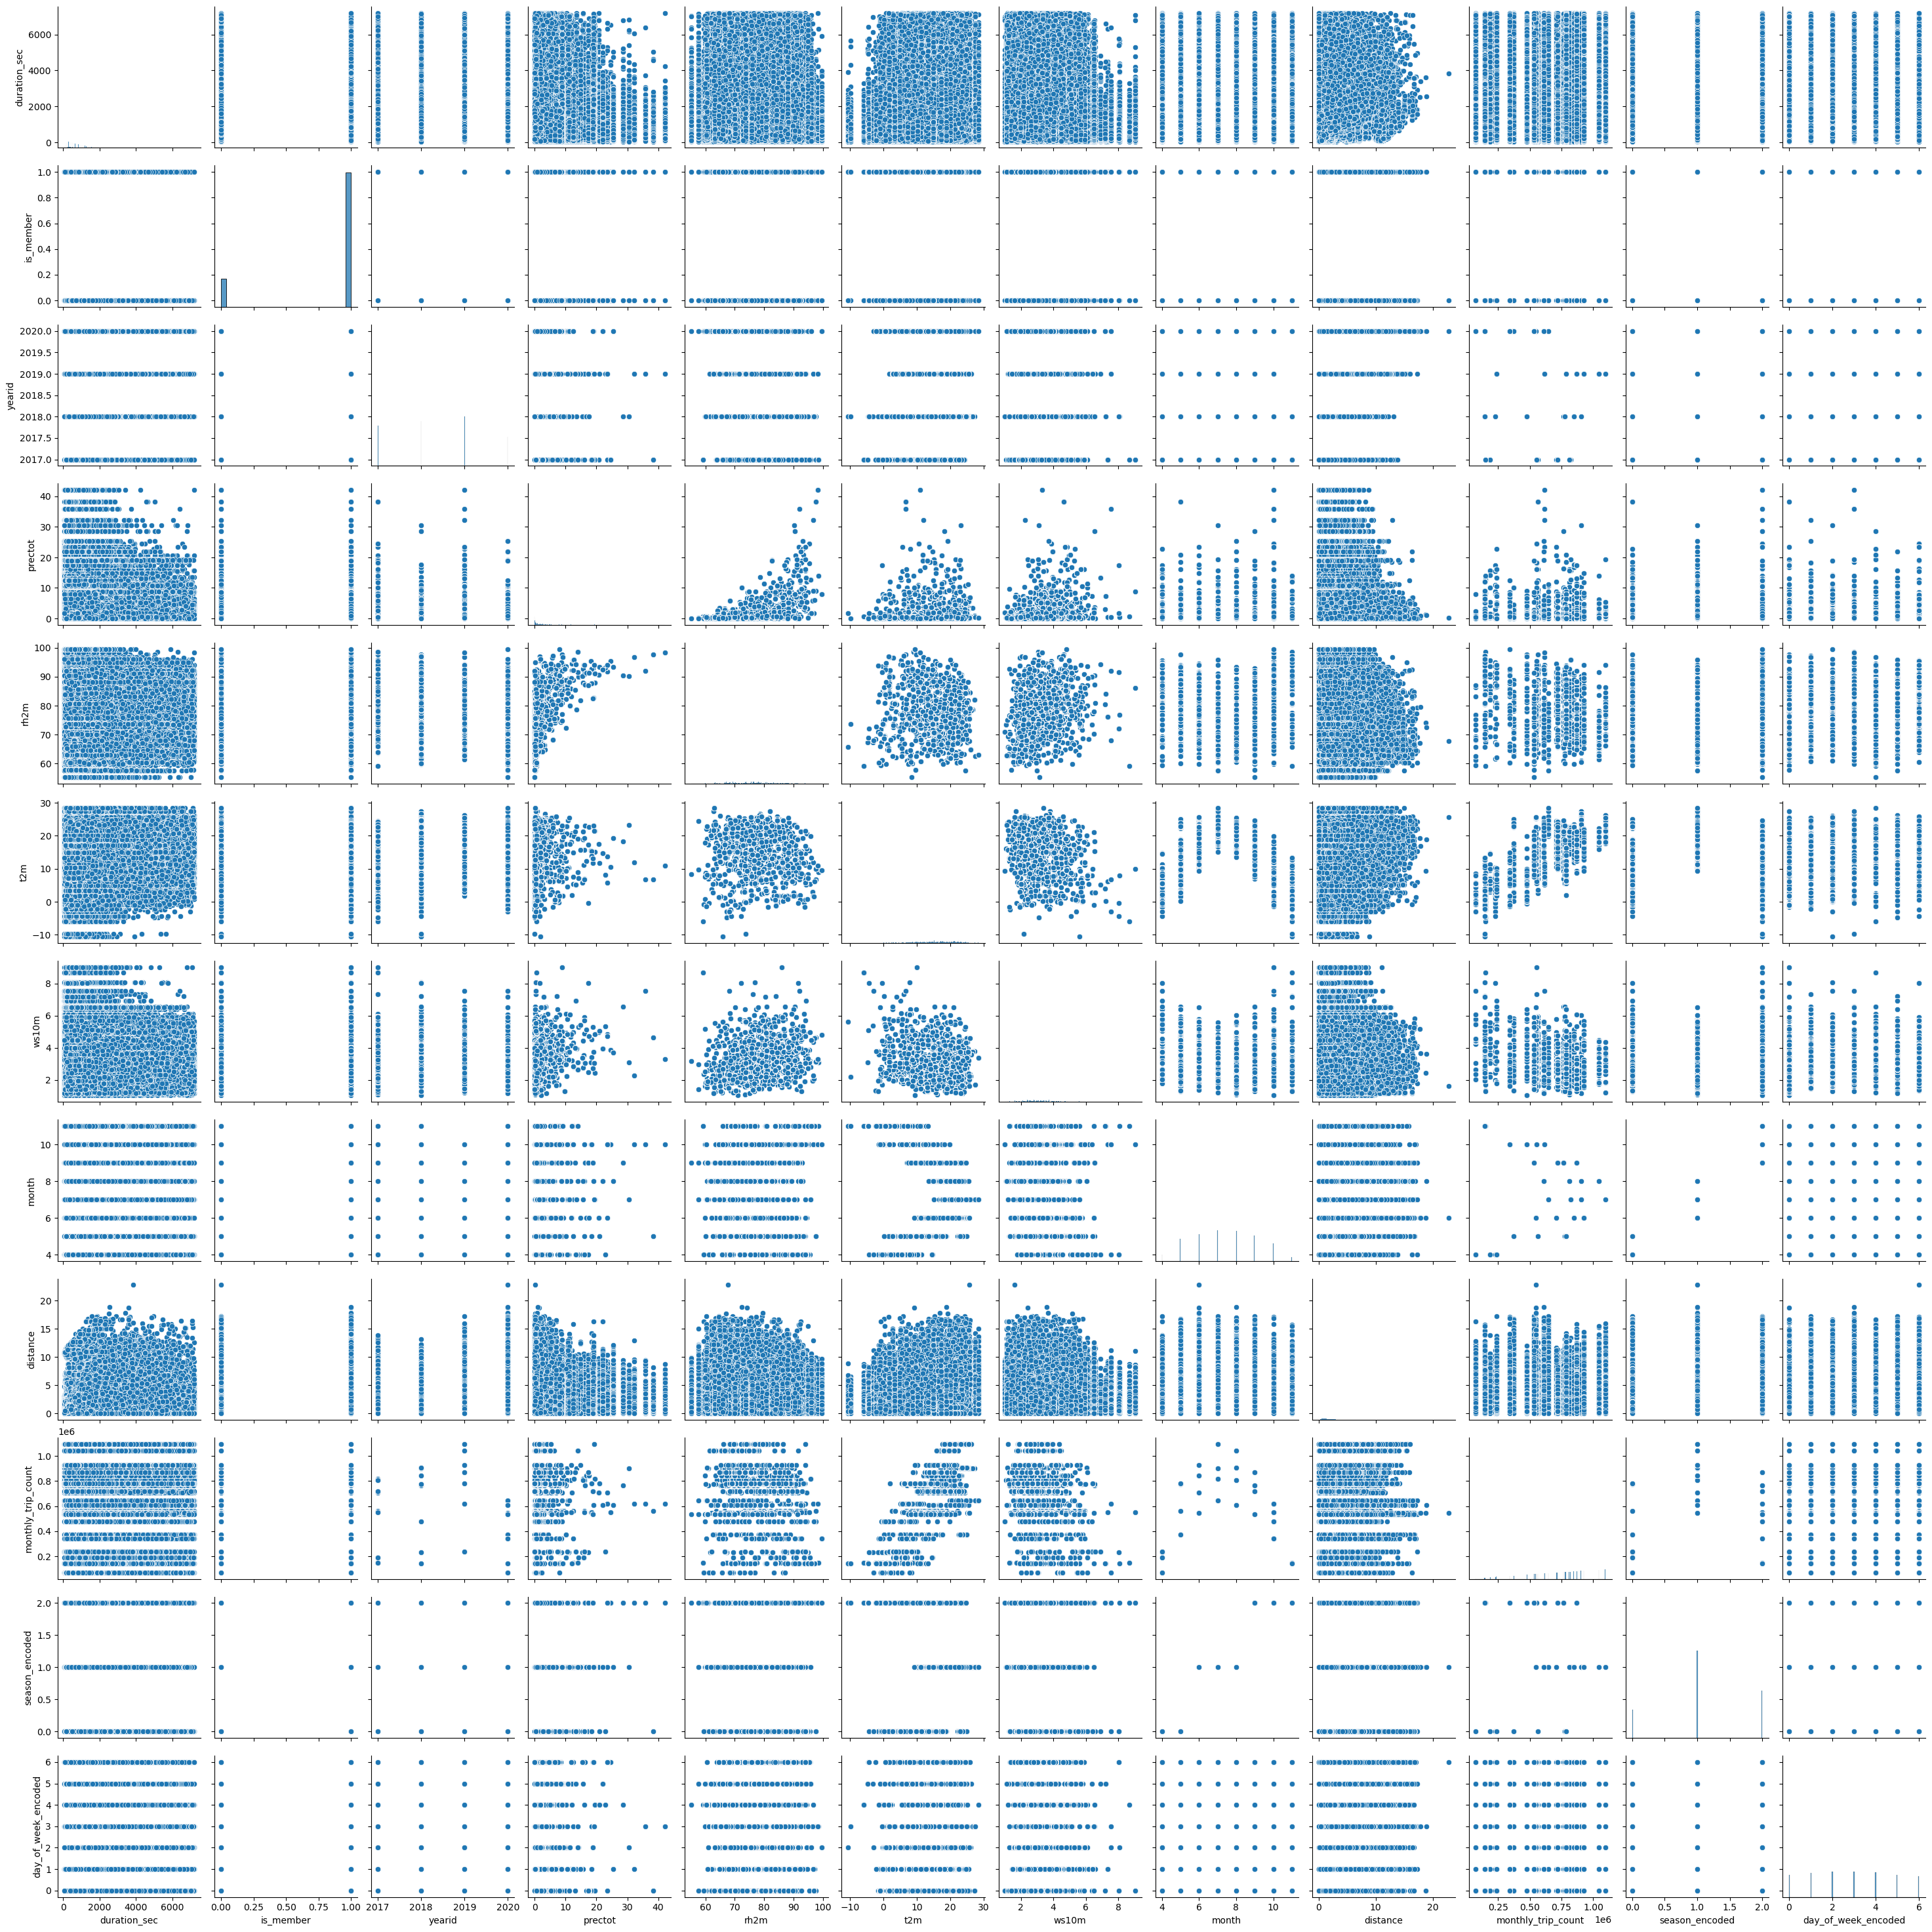

In [15]:
# Create a pair plot 

g = sns.pairplot(sub_2)

Here are some key observations:


- Temperature and Monthly Trip Count: There is a positive correlation between t2m (temperature) and monthly_trip_count, indicating that higher temperatures are associated with more trips.

- Temperature and Distance: There appears to be a positive correlation between t2m (temperature) and distance, suggesting that higher temperatures are associated with longer trips.

- Temperature and Relative Humidity: The scatter plot between t2m and rh2m (relative humidity) does not show a strong correlation, indicating a weak relationship between these two variables.

- Monthly Trends: The scatter plots involving month show seasonal variations. Higher temperatures (t2m) are more frequent in specific months, reflecting seasonal patterns.

- Similar Seasonal Patterns: The plots of monthly_trip_count vs. month and t2m vs. month both exhibit similar seasonal shapes. This indicates that the number of trips and the temperature follow a seasonal pattern, peaking during the warmer months and dipping during the colder months. Despite this similar shape, the clustering of data points differs. 

- The pair plot confirms trips tend to be shorter under some extreme conditions like wind or precipitation.

- Summer is the season that records the most trips.

In [17]:
# saving figure
g.savefig("pairplot.png") 

### 4. Create a categorical plot and interpret the results

In [18]:
pd.options.mode.copy_on_write = True 

In [19]:
# Categorize temperatures
small.loc[small['t2m'] < 0, 't2m_flag'] = 'Very Cold'
small.loc[(small['t2m'] >= 0) & (small['t2m'] < 5), 't2m_flag'] = 'Cold'
small.loc[(small['t2m'] >= 5) & (small['t2m'] < 15), 't2m_flag'] = 'Cool'
small.loc[(small['t2m'] >= 15) & (small['t2m'] < 20), 't2m_flag'] = 'Mild'
small.loc[(small['t2m'] >= 20) & (small['t2m'] < 25), 't2m_flag'] = 'Warm'
small.loc[(small['t2m'] >= 25) & (small['t2m'] < 30), 't2m_flag'] = 'Hot'
small.loc[small['t2m'] >= 30, 't2m_flag'] = 'Very Hot'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

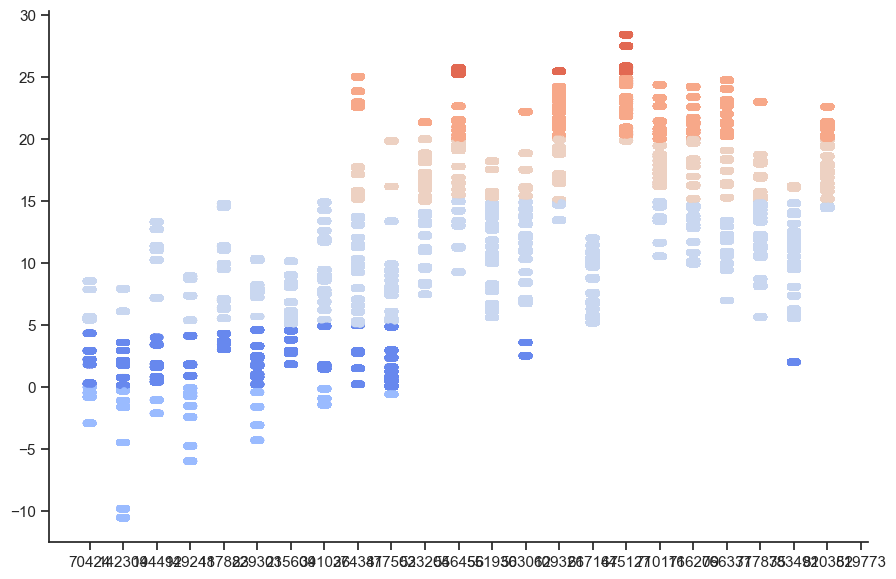

In [14]:
# Create the categorical plot
sns.set(style="ticks")
g2 = sns.catplot(
    x="monthly_trip_count", 
    y="t2m", 
    hue="t2m_flag", 
    data=small, 
    kind="strip", 
    palette="coolwarm", 
    height=6, 
    aspect=1.5
)

# Add labels and title
g2.set_axis_labels("Monthly Trip Count", "Temperature (°C)")
g2.fig.suptitle("Monthly Trip Count vs Temperature Categories in Montreal", y=1.02)
g2.add_legend(title="Temperature Category")

In [20]:
pd.option_context('mode.use_inf_as_na', True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.02, 'Monthly Trip Count vs Temperature Categories in Montreal')

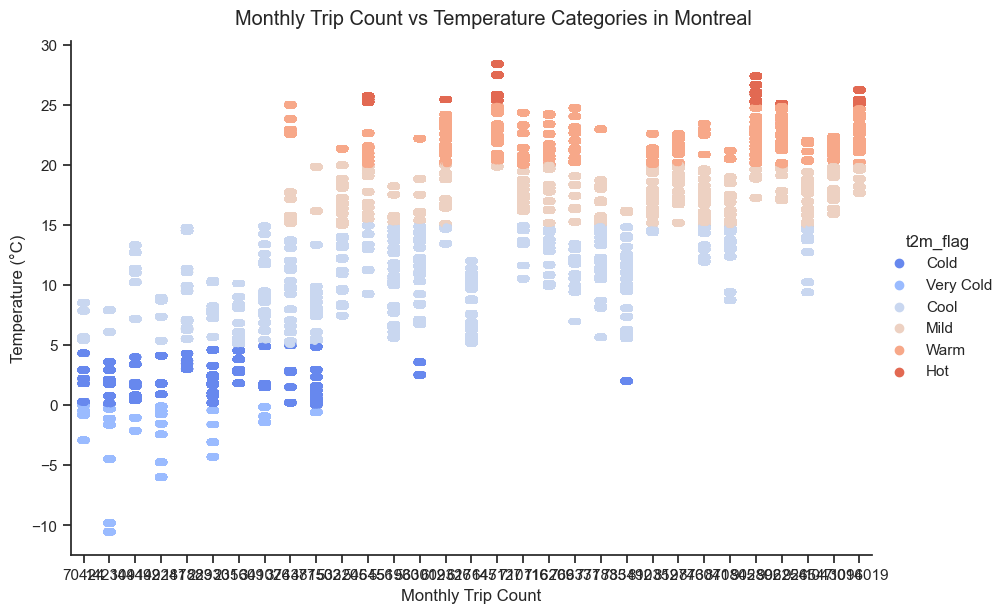

In [21]:
sns.set(style="ticks")
g2 = sns.catplot(
    x="monthly_trip_count", 
    y="t2m", 
    hue="t2m_flag", 
    data=small, 
    kind="strip", 
    palette="coolwarm", 
    height=6, 
    aspect=1.5
)

# Add labels and title
g2.set_axis_labels("Monthly Trip Count", "Temperature (°C)")
g2.fig.suptitle("Monthly Trip Count vs Temperature Categories in Montreal", y=1.02)

The plot reveals a trend where higher trip counts are associated with higher temperatures. The color gradient from blue (colder temperatures) to red (warmer temperatures) visually reinforces the positive correlation between monthly trip count and temperature.

In [22]:
# saving figure
g2.savefig("catplot.png") 

### Answering previous questions:

#### Does weather affect the duration of bike trips?
The scatter plots for duration_sec against t2m do not show a clear linear correlation, suggesting that temperature may not have a straightforward impact on trip duration. Similarly, the plots for duration_sec vs prectot and ws10m also do not reveal a strong correlation. Therefore, based on the pair plot, there isn't strong evidence to suggest that weather variables significantly affect the duration of bike trips.

#### Are people less likely to use Bixi bikes during rain, wind, or heatwaves?
The scatter plots involving monthly_trip_count and prectot (precipitation) indicate that higher precipitation levels are associated with lower trip counts. This suggests that rain negatively impacts bike usage.
The plots involving monthly_trip_count and ws10m (wind speed) show no strong correlation, indicating that wind may not significantly affect bike usage, but it does show it affects distance and duration. For heatwaves, by examining monthly_trip_count and high t2m (temperature) values, it appears that higher temperatures do not significantly deter bike usage. In fact, higher trip counts are often associated with higher temperatures.

### Hypothesis:
If the weather conditions in a given year are characterized by moderate temperatures, low precipitation, and moderate wind speeds, then that year will be the most profitable for Bixi.